In [3]:
#! pip install sklearn

In [5]:
import numpy as np
import seaborn as sns
import statistics
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
np.mean(df["total_bill"])

19.78594262295082

In [8]:
np.median(df["total_bill"])

17.795

In [9]:
statistics.mode(df["total_bill"])

13.42

C:\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_bill'>

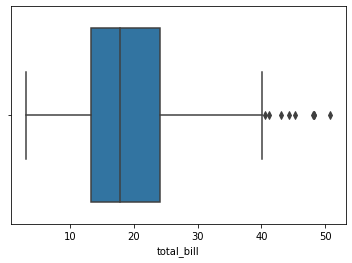

In [10]:
#using boxpot to see outliers
sns.boxplot(df["total_bill"])

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

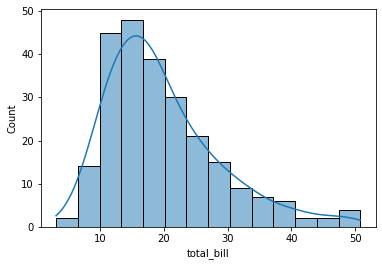

In [12]:
sns.histplot(df["total_bill"], kde=True)

C:\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


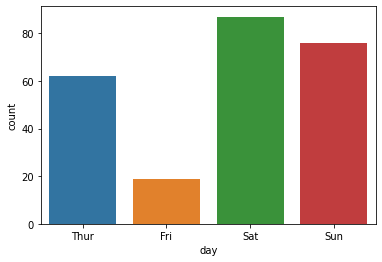

In [14]:
sns.countplot(df.day);

C:\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time', ylabel='count'>

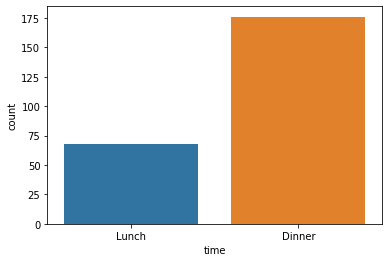

In [15]:
sns.countplot(df.time)

In [19]:
#Calculate the percentile 
percent = np.percentile(df["total_bill"], [25,75])
IQR = percent[1] - percent[0]

In [20]:
IQR

10.779999999999998

In [21]:
iris_df = sns.load_dataset('iris')

In [23]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [47]:
datasets = [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107,10,13,12,14,12,108,
           12,11,14,13,15,10,14,13,15,10]

C:\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

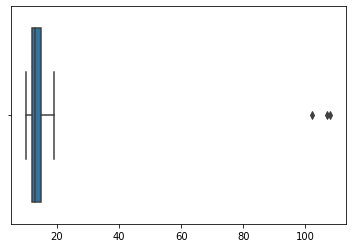

In [63]:
sns.boxplot(datasets)

In [44]:
outlier = []
def detect_outliers(data, thrusthold=3):
    
    
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score)>=thrusthold:
            outlier.append(i)
    return outlier

In [45]:
detect_outliers(datasets)

[107, 108]

In [38]:
# detect outlier using IQR
datasets.sort()

In [40]:
q1,q3 = np.percentile(datasets, [25,75])
print(q1,q3)

12.0 15.0


In [41]:
IQR = q3-q1

In [42]:
# lowerFence
lower_fence = q1 - 1.5*IQR
upper_fence = q3 + 1.5*IQR

In [43]:
for i in datasets:
    if i > upper_fence or i < lower_fence:
        print(i)

102
107
108


In [59]:
def IQR_outliers(data):
    outliers = []
    sort_data = sorted(data)
    q1,q3 = np.percentile(sort_data,[25,75])
    IQR = q3-q1
    lower_fence = q1 - 1.5*IQR
    upper_fence = q3 + 1.5*IQR 
    for i in sort_data:
        if i > upper_fence or i < lower_fence:
            outliers.append(i)
    return outliers

In [60]:
IQR_outliers(datasets)

[102, 107, 108]